<a href="https://colab.research.google.com/github/shashwatns/CIFAR-10-Image-Classification/blob/main/CIFAR_10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author- Shashwat Narayan Singh


Roll nos.- ZDA23M012


Program- M.Tech

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                        # all the necessary libaries for the assingnment
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
import tensorflow as tf


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()             # importing cifar dataset from google collab


print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


x_train_flat = x_train_flat.astype('float32')                 # converting all the images to pixels
x_test_flat = x_test_flat.astype('float32')

x_train_flat /= 255.0
x_test_flat /= 255.0


y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_flat, y_train)


rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train_flat, y_train)


nb_classifier = GaussianNB()                                                 # defining all the classifiers
nb_classifier.fit(x_train_flat, y_train)


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_flat, y_train)


KNeighborsClassifier()

In [ ]:
classifiers = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "Naive Bayes": nb_classifier,                          # all the ML models
    "KNN (k=5)": knn_classifier
}

In [ ]:
for clf_name, clf in classifiers.items():
    y_pred = clf.predict(x_test_flat)
    accuracy = clf.score(x_test_flat, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(clf_name + ":\n")                                        # printing the accuracy , precision , Recall and F1 score
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\n")

Decision Tree:

Accuracy: 0.2723
Precision: 0.27206949810244596
Recall: 0.27230000000000004
F1 Score: 0.27208160841130413


Random Forest:

Accuracy: 0.4662
Precision: 0.4618551099166755
Recall: 0.46620000000000006
F1 Score: 0.46250907886928944


Naive Bayes:

Accuracy: 0.2976
Precision: 0.3112140667418117
Recall: 0.29760000000000003
F1 Score: 0.2754627838655197


KNN (k=5):

Accuracy: 0.3398
Precision: 0.43042618255284965
Recall: 0.3398
F1 Score: 0.3260170986061005




In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Decision Tree:

Accuracy: 0.2723
Confusion Matrix:
[[350  72  91  53  70  44  38  54 156  72]
 [ 67 281  72  77  56  56  63  65 102 161]
 [ 98  44 234  96 134 109 104  81  44  56]
 [ 57  63 118 193 108 131 132 101  40  57]
 [ 62  37 149  84 234 116 124 100  45  49]
 [ 57  53 114 151  95 214 103  85  64  64]
 [ 51  45 129 118 124 103 279  67  29  55]
 [ 68  89  75  93  96 104  78 266  56  75]
 [139 108  44  49  57  48  29  39 394  93]
 [ 90 181  51  62  43  55  54  83 103 278]]




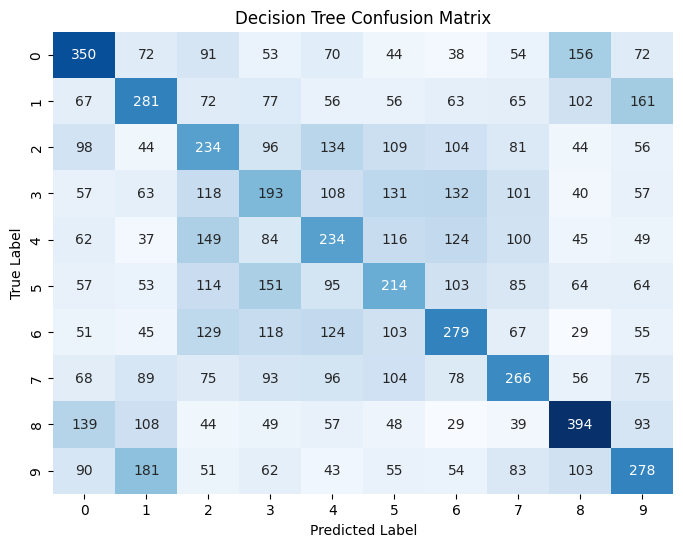

Random Forest:

Accuracy: 0.4662
Confusion Matrix:
[[562  45  62  17  29  27  24  26 151  57]
 [ 35 557  19  28  21  33  39  24  67 177]
 [101  43 327  70 143  76 124  61  24  31]
 [ 54  47  87 276  84 178 127  61  20  66]
 [ 52  24 144  60 402  46 148  81  25  18]
 [ 35  37  75 153  88 393  87  83  23  26]
 [ 11  39  79  66 117  57 551  31   9  40]
 [ 54  46  49  58 103  93  49 439  22  87]
 [ 93  83  19  26  21  39  12  21 613  73]
 [ 45 164  19  29  18  32  30  43  78 542]]




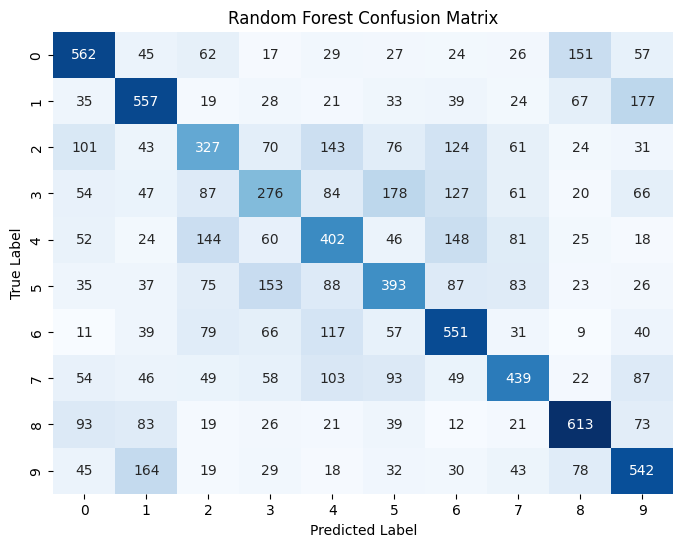

Naive Bayes:

Accuracy: 0.2976
Confusion Matrix:
[[494  20  39  10  84  34  50   9 200  60]
 [141 166  24  31  66  72 192  19 121 168]
 [225  24  83  15 292  48 209  21  54  29]
 [163  36  54  76 151 129 262  26  34  69]
 [ 86   8  57  26 417  38 265  22  50  31]
 [156  17  55  51 167 264 159  36  57  38]
 [106   2  60  18 228  46 467  15  19  39]
 [134  24  36  41 228  94 102 131  72 138]
 [168  41  18  17  56  83  39   8 471  99]
 [144  67  17  20  48  32 101  23 141 407]]




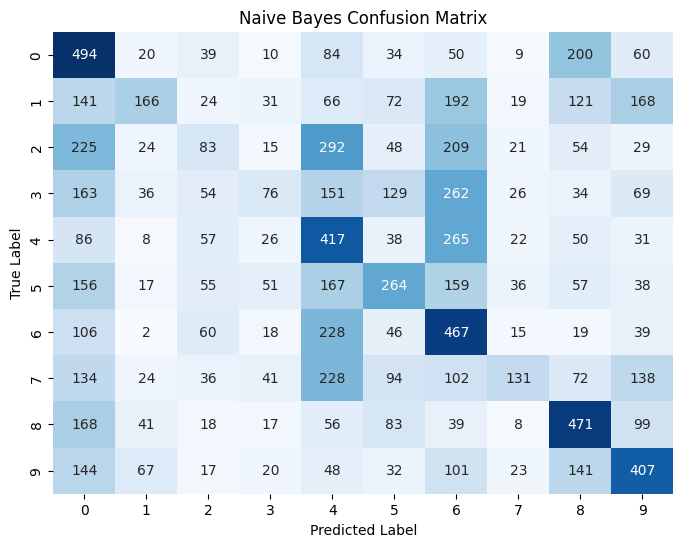

KNN (k=5):

Accuracy: 0.3398
Confusion Matrix:
[[537   4 117  13  59   7  26   5 225   7]
 [139 205 110  42 155  36  61  10 217  25]
 [107   3 452  52 226  34  66   8  49   3]
 [ 70   8 234 217 193 115  95  17  46   5]
 [ 64   1 262  35 514  21  41   7  53   2]
 [ 71   3 227 155 187 220  66  14  51   6]
 [ 27   2 273  68 314  37 248   2  28   1]
 [ 93  10 181  50 280  52  53 210  67   4]
 [141  14  52  38  54  16  14   8 655   8]
 [153  67  98  68 124  23  46  29 252 140]]




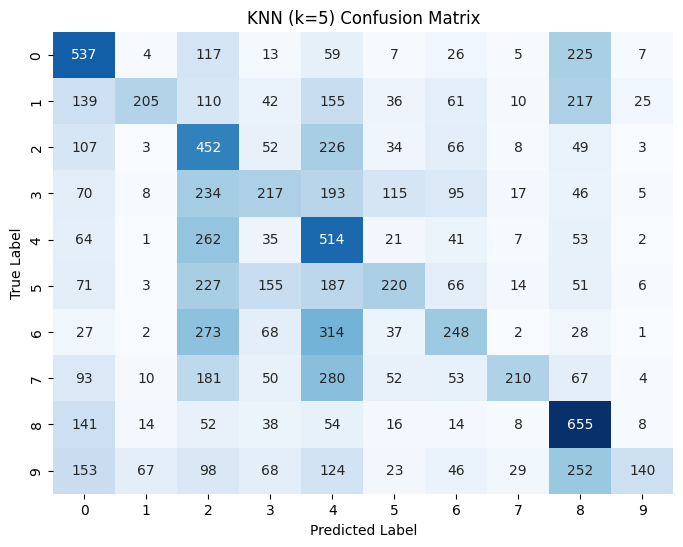

In [ ]:
for clf_name, clf in classifiers.items():
    y_pred = clf.predict(x_test_flat)
    accuracy = clf.score(x_test_flat, y_test)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(clf_name + ":\n")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")                                        # printing the confusion matrix for all the models
    print(confusion_mat)
    print("\n")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(clf_name + ' Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)  # 20% of 80% validation set

In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


x_train_flat = x_train_flat.astype('float32')
x_val_flat = x_val_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')


x_train_flat /= 255.0
x_val_flat /= 255.0
x_test_flat /= 255.0

In [ ]:
y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)
y_test = np.squeeze(y_test)

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_flat, y_train)


rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train_flat, y_train)

nb_classifier = GaussianNB()
nb_classifier.fit(x_train_flat, y_train)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_flat, y_train)


KNeighborsClassifier()

In [ ]:
classifiers = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "Naive Bayes": nb_classifier,
    "KNN (k=5)": knn_classifier
}

Decision Tree:

Validation Accuracy: 0.2536
Precision: 0.254755390586476
Recall: 0.25395039040503914
F1 Score: 0.25393721347395026
Confusion Matrix:
[[331  78  79  52  65  54  32  67 133  82]
 [ 84 248  65  63  62  62  57  81  98 159]
 [ 76  55 188 116 147 119 127 103  57  42]
 [ 64  74 103 189 104 151 136  94  57  51]
 [ 72  44 135  84 223  83 129  85  47  31]
 [ 68  54 117 133 116 201  90 121  64  51]
 [ 46  48 125 129 133 113 261  66  23  52]
 [ 71  53  98 107 112  96  83 244  46  84]
 [162  89  49  55  62  58  36  49 377  80]
 [100 143  65  93  65  68  46  90  96 274]]




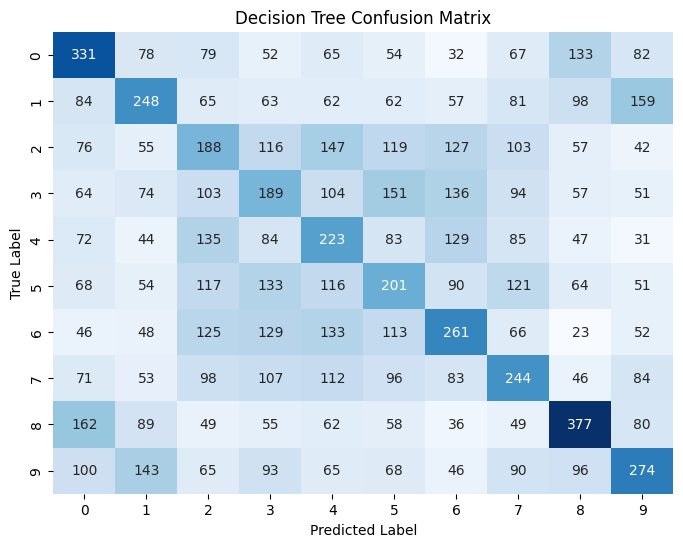

Random Forest:

Validation Accuracy: 0.4521
Precision: 0.4486845546749711
Recall: 0.4524598883269177
F1 Score: 0.4486604878154166
Confusion Matrix:
[[497  63  52  20  26  29  18  31 164  73]
 [ 30 512  10  42  26  27  41  42  58 191]
 [ 98  42 311  77 152  90 122  75  38  25]
 [ 41  63  78 290  90 192 141  57  22  49]
 [ 60  20 119  42 386  45 125  72  34  30]
 [ 41  50  83 154  97 374  87  69  24  36]
 [ 16  41  79  74 127  54 529  34   7  35]
 [ 44  44  62  51 128  71  45 437  22  90]
 [101  98  14  25  22  55  11  27 599  65]
 [ 41 174  17  37  18  25  37  33  72 586]]




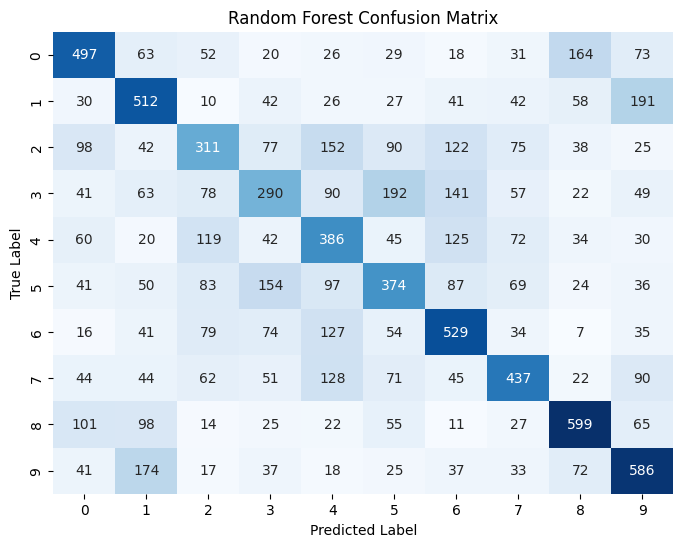

Naive Bayes:

Validation Accuracy: 0.2838
Precision: 0.2903552952819297
Recall: 0.285409963713768
F1 Score: 0.26119568442768293
Confusion Matrix:
[[433  38  20  11  92  37  46   9 215  72]
 [123 142  19  50  71  82 172  21 119 180]
 [207  29  81  17 310  41 215  29  60  41]
 [156  40  60  76 144 160 277  26  30  54]
 [ 93   5  39  22 408  34 221  23  53  35]
 [144  30  64  46 177 255 188  35  44  32]
 [101  11  41  22 223  47 479  17  20  35]
 [133  27  35  40 262  86 112 115  56 128]
 [195  42  17  21  51  87  59  12 442  91]
 [133  84  16  21  55  30 106  25 163 407]]




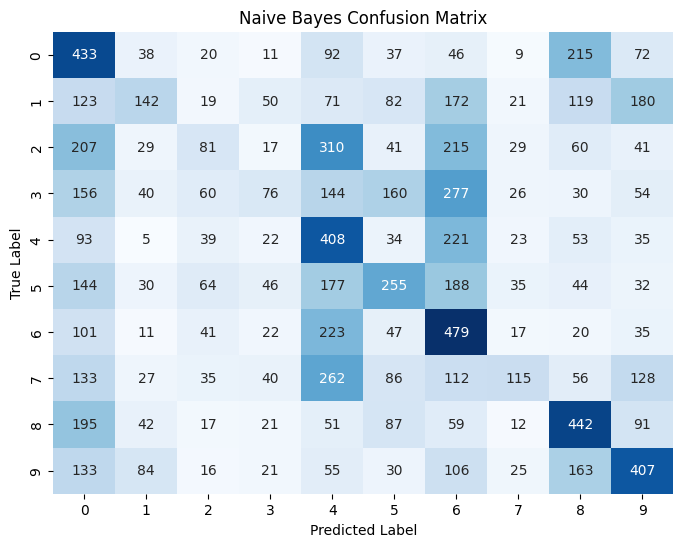

KNN (k=5):

Validation Accuracy: 0.3325
Precision: 0.42660943408366936
Recall: 0.33427759981985805
F1 Score: 0.3186776412486527
Confusion Matrix:
[[525   7  83  14  67  11  26  11 220   9]
 [140 199  94  35 183  28  72  10 192  26]
 [138   5 425  47 256  42  52   9  56   0]
 [ 86   9 250 222 195 113  98   8  39   3]
 [ 96   3 213  41 470  14  32   9  55   0]
 [ 75   6 242 164 183 223  77   5  39   1]
 [ 39   7 261  60 294  41 260   7  26   1]
 [ 96   3 181  63 289  39  56 192  62  13]
 [148  12  46  35  50  20  15   3 679   9]
 [164  58 111  54 135  34  48  24 282 130]]




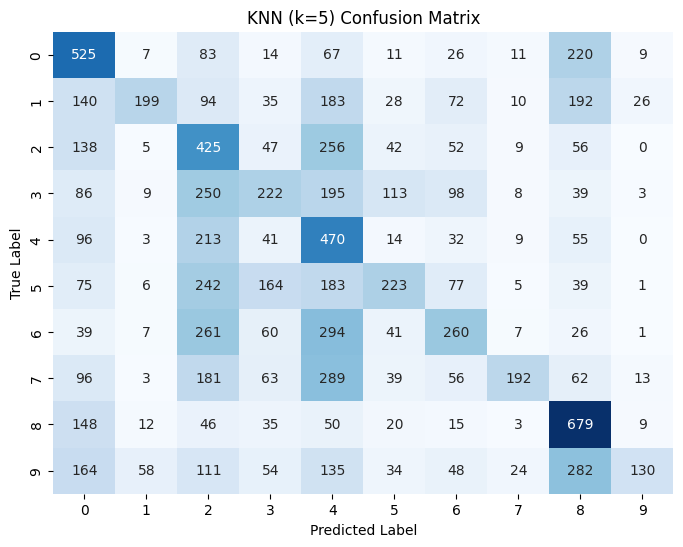

In [ ]:
for clf_name, clf in classifiers.items():
    y_pred_val = clf.predict(x_val_flat)
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val, average='macro')
    recall = recall_score(y_val, y_pred_val, average='macro')
    f1 = f1_score(y_val, y_pred_val, average='macro')
    confusion_mat = confusion_matrix(y_val, y_pred_val)

    print(clf_name + ":\n")
    print("Validation Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(confusion_mat)
    print("\n")

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(clf_name + ' Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


x_train_flat = x_train_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')


x_train_flat /= 255.0
x_test_flat /= 255.0


y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)


In [ ]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": GaussianNB(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

Decision Tree Cross-Validation Results:

Average Accuracy: 0.26150004061001225
Average Precision: 0.2619909622809072
Average Recall: 0.2615009051010926
Average F1 Score: 0.2615952652793825




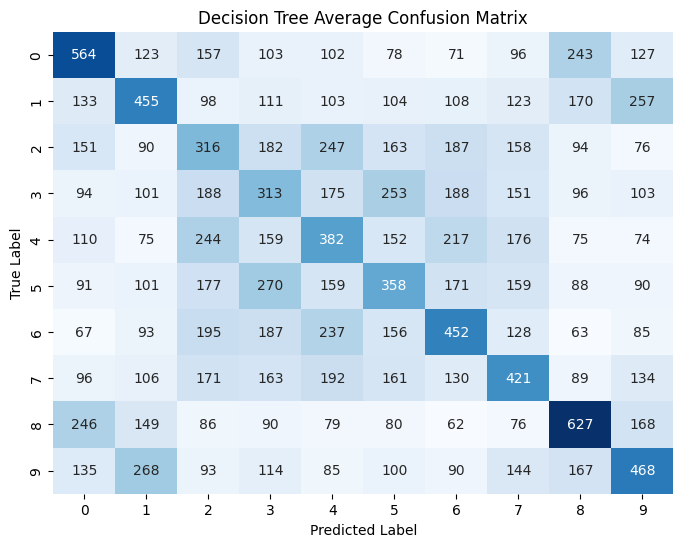

Random Forest Cross-Validation Results:

Average Accuracy: 0.45249998756175125
Average Precision: 0.44951982046886957
Average Recall: 0.45250155251062624
Average F1 Score: 0.4493194339034135




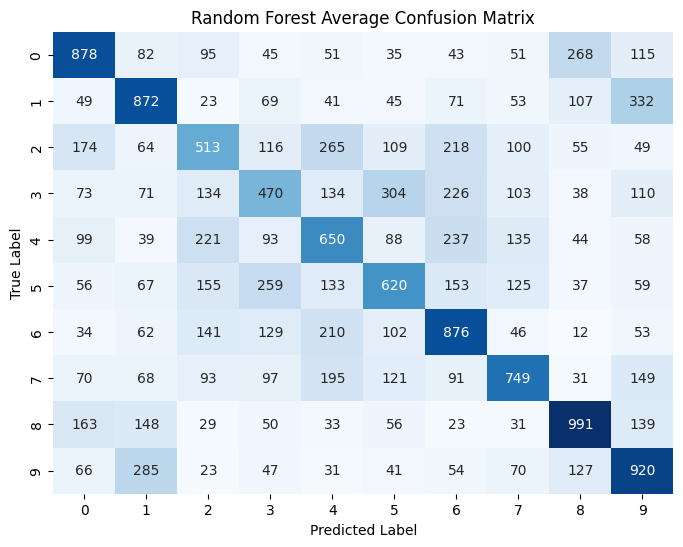

Naive Bayes Cross-Validation Results:

Average Accuracy: 0.28438001622782855
Average Precision: 0.2952183617283109
Average Recall: 0.28438141903432035
Average F1 Score: 0.263002118273418




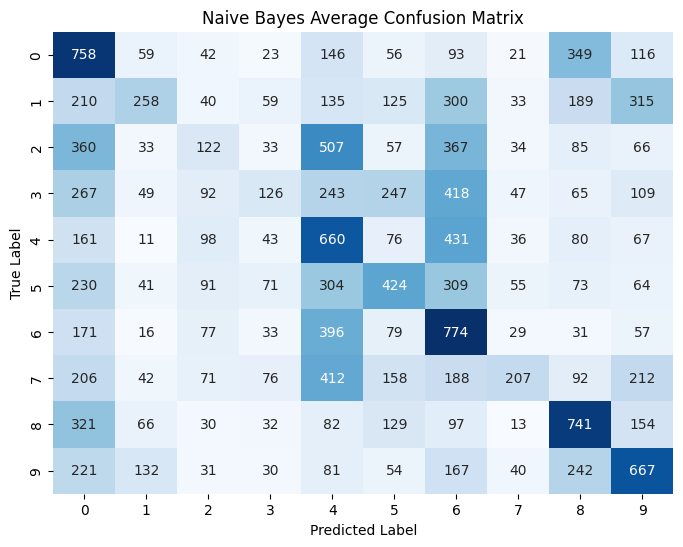

KNN (k=5) Cross-Validation Results:

Average Accuracy: 0.3254800114606132
Average Precision: 0.41694301642700715
Average Recall: 0.3254793579099306
Average F1 Score: 0.3104843457043133




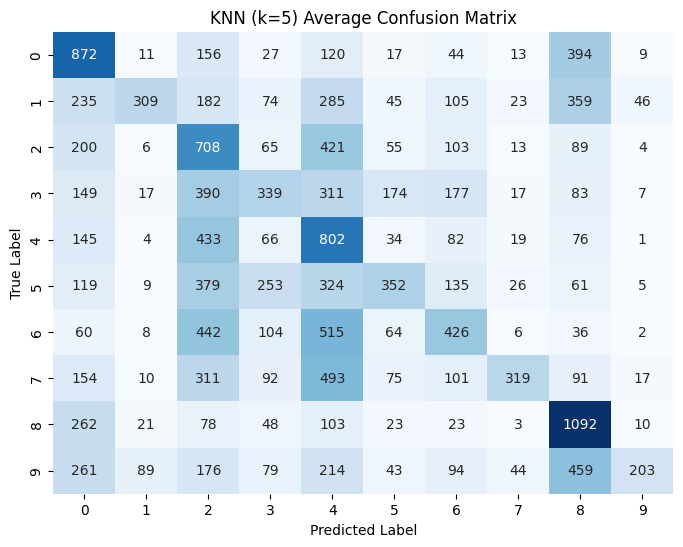

In [ ]:
for clf_name, clf in classifiers.items():
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1s = []                                                                             # performing 3 fold cross validation on all the machine learning models
    confusion_matrices = []

    for train_index, val_index in skf.split(x_train_flat, y_train):
        x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

        clf.fit(x_train_cv, y_train_cv)
        y_pred_cv = clf.predict(x_val_cv)

        accuracies.append(accuracy_score(y_val_cv, y_pred_cv))
        precisions.append(precision_score(y_val_cv, y_pred_cv, average='macro'))
        recalls.append(recall_score(y_val_cv, y_pred_cv, average='macro'))
        f1s.append(f1_score(y_val_cv, y_pred_cv, average='macro'))
        confusion_matrices.append(confusion_matrix(y_val_cv, y_pred_cv))

    print(clf_name + " Cross-Validation Results:\n")
    print("Average Accuracy:", np.mean(accuracies))
    print("Average Precision:", np.mean(precisions))
    print("Average Recall:", np.mean(recalls))
    print("Average F1 Score:", np.mean(f1s))
    print("\n")

    avg_confusion_mat = np.mean(confusion_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(avg_confusion_mat.astype(int), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(clf_name + ' Average Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Decision Tree Cross-Validation Results:

Average Accuracy: 0.25992
Average Precision: 0.26053373984036277
Average Recall: 0.25992
Average F1 Score: 0.2601089120528405




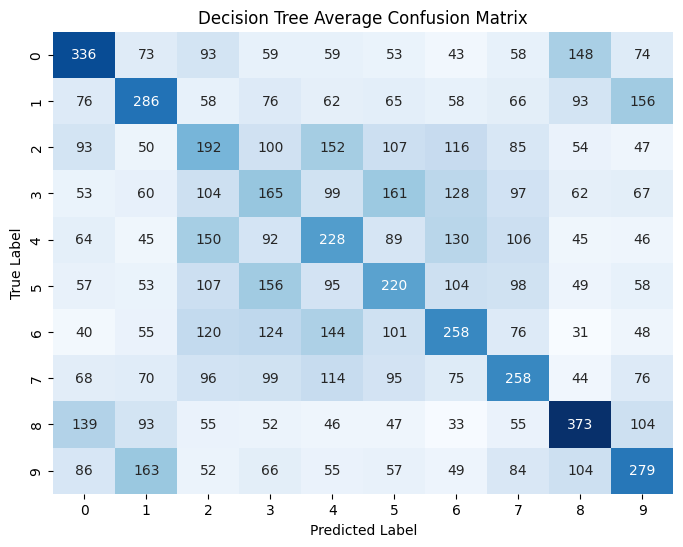

Random Forest Cross-Validation Results:

Average Accuracy: 0.45822
Average Precision: 0.4545897189280093
Average Recall: 0.45822
Average F1 Score: 0.45475816975263983




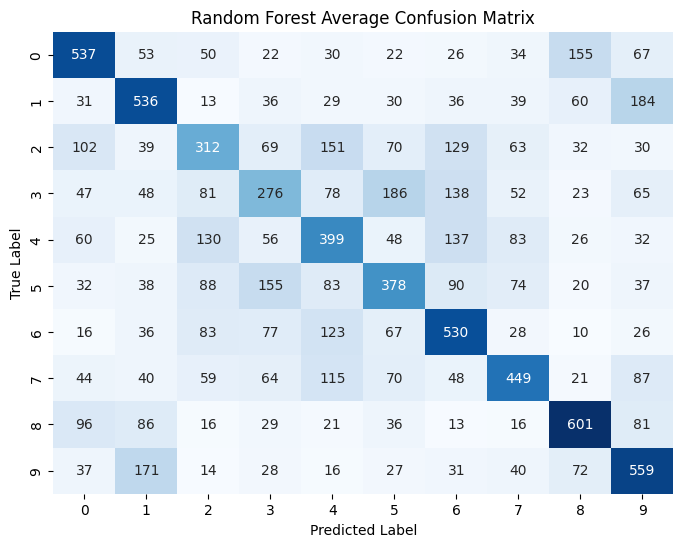

Naive Bayes Cross-Validation Results:

Average Accuracy: 0.28480000000000005
Average Precision: 0.2955955084470586
Average Recall: 0.28480000000000005
Average F1 Score: 0.2633039374765517




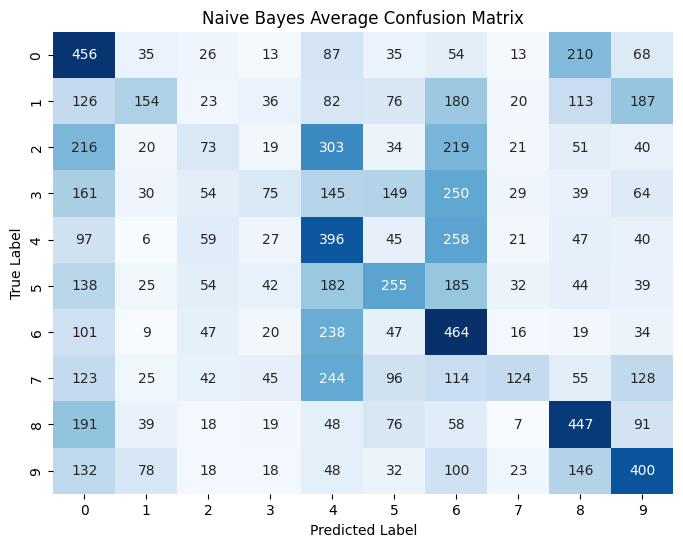

KNN (k=5) Cross-Validation Results:

Average Accuracy: 0.3327
Average Precision: 0.42636486152381925
Average Recall: 0.33270000000000005
Average F1 Score: 0.31852543093801977




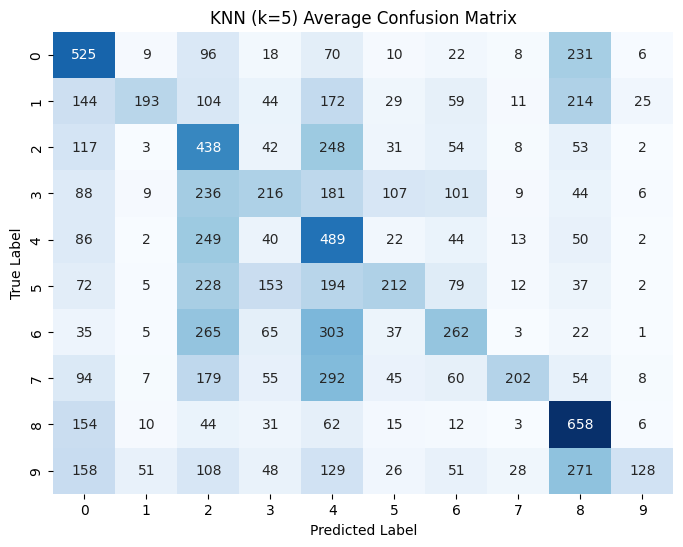

In [ ]:
for clf_name, clf in classifiers.items():
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    confusion_matrices = []
                                                                                            # performing 5 fold analysis cross validation on all the ML models
    for train_index, val_index in skf.split(x_train_flat, y_train):
        x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

        clf.fit(x_train_cv, y_train_cv)
        y_pred_cv = clf.predict(x_val_cv)

        accuracies.append(accuracy_score(y_val_cv, y_pred_cv))
        precisions.append(precision_score(y_val_cv, y_pred_cv, average='macro'))
        recalls.append(recall_score(y_val_cv, y_pred_cv, average='macro'))
        f1s.append(f1_score(y_val_cv, y_pred_cv, average='macro'))
        confusion_matrices.append(confusion_matrix(y_val_cv, y_pred_cv))

    print(clf_name + " Cross-Validation Results:\n")
    print("Average Accuracy:", np.mean(accuracies))
    print("Average Precision:", np.mean(precisions))
    print("Average Recall:", np.mean(recalls))
    print("Average F1 Score:", np.mean(f1s))
    print("\n")

    avg_confusion_mat = np.mean(confusion_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(avg_confusion_mat.astype(int), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(clf_name + ' Average Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Decision Tree Cross-Validation Results:

Average Accuracy: 0.2632
Average Precision: 0.2640633926145054
Average Recall: 0.2632
Average F1 Score: 0.2634717785954668




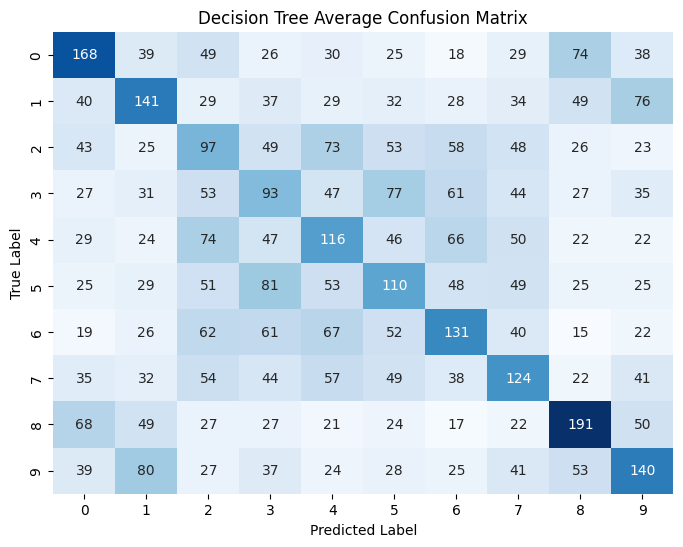

Random Forest Cross-Validation Results:

Average Accuracy: 0.46018
Average Precision: 0.4569187638280061
Average Recall: 0.46018
Average F1 Score: 0.4568362214099168




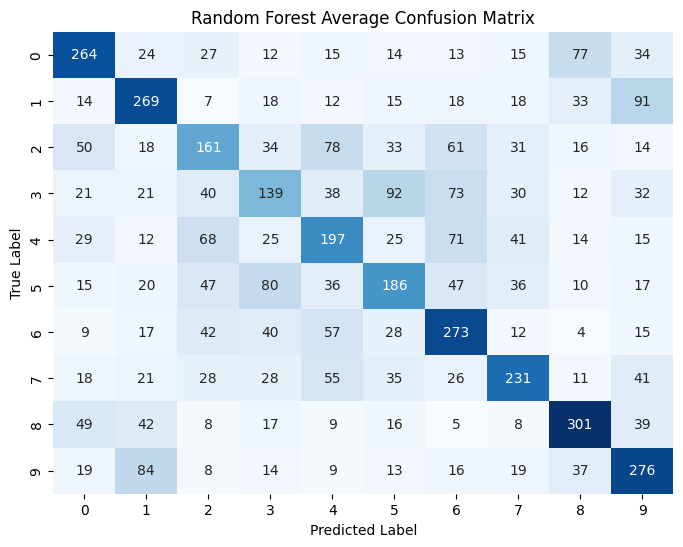

Naive Bayes Cross-Validation Results:

Average Accuracy: 0.28447999999999996
Average Precision: 0.294711544502295
Average Recall: 0.28448
Average F1 Score: 0.2628604439425539




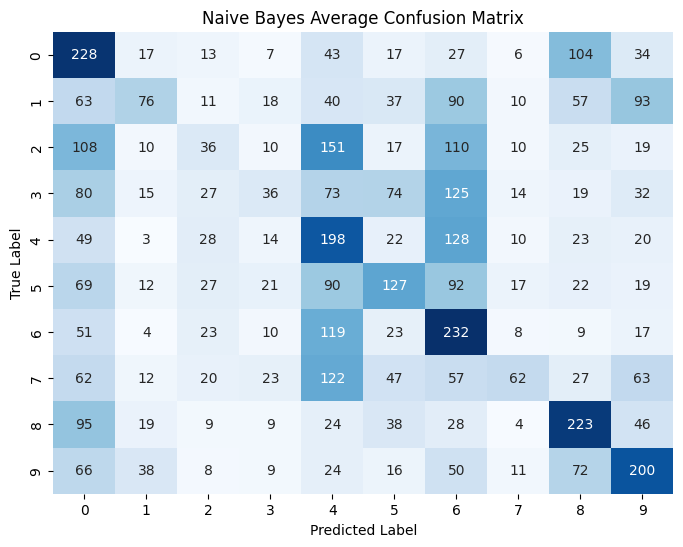

KNN (k=5) Cross-Validation Results:

Average Accuracy: 0.33602
Average Precision: 0.42893888417254233
Average Recall: 0.33602
Average F1 Score: 0.3223506850986591




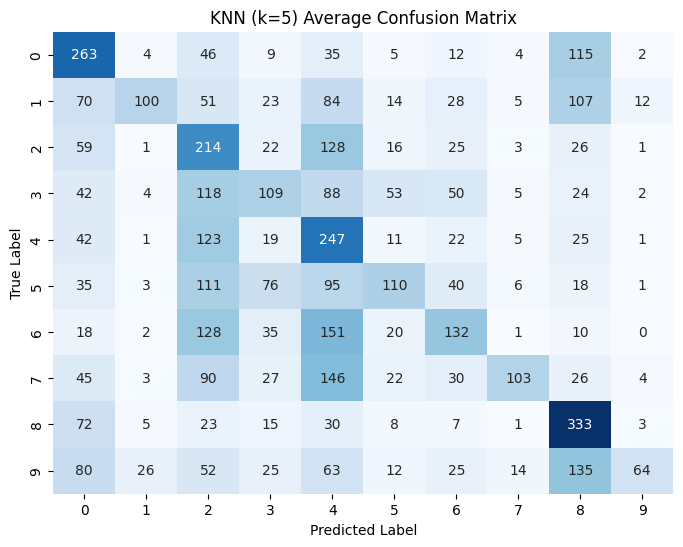

In [ ]:
for clf_name, clf in classifiers.items():
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1s = []                                                                             # performing 10 fold cross validation on all the ML models
    confusion_matrices = []

    for train_index, val_index in skf.split(x_train_flat, y_train):
        x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

        clf.fit(x_train_cv, y_train_cv)
        y_pred_cv = clf.predict(x_val_cv)

        accuracies.append(accuracy_score(y_val_cv, y_pred_cv))
        precisions.append(precision_score(y_val_cv, y_pred_cv, average='macro'))
        recalls.append(recall_score(y_val_cv, y_pred_cv, average='macro'))
        f1s.append(f1_score(y_val_cv, y_pred_cv, average='macro'))
        confusion_matrices.append(confusion_matrix(y_val_cv, y_pred_cv))

    print(clf_name + " Cross-Validation Results:\n")
    print("Average Accuracy:", np.mean(accuracies))
    print("Average Precision:", np.mean(precisions))
    print("Average Recall:", np.mean(recalls))
    print("Average F1 Score:", np.mean(f1s))
    print("\n")

    avg_confusion_mat = np.mean(confusion_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(avg_confusion_mat.astype(int), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(clf_name + ' Average Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Convert pixel values to float
x_train_flat = x_train_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')

# Normalize pixel values to range [0, 1]
x_train_flat /= 255.0
x_test_flat /= 255.0

# Convert labels to 1D array
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [ ]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": GaussianNB(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

In [ ]:
dt_classifier = DecisionTreeClassifier()


loo = LeaveOneOut()
accuracies = []
precisions = []
recalls = []                                                                           # perfoming LOOCV leave one out cross validation
f1s = []
confusion_matrices = []

for train_index, val_index in loo.split(x_train_flat):
    x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    dt_classifier.fit(x_train_cv, y_train_cv)
    y_pred_cv = dt_classifier.predict(x_val_cv)

    accuracies.append(accuracy_score(y_val_cv, y_pred_cv))
    precisions.append(precision_score(y_val_cv, y_pred_cv, average='macro'))
    recalls.append(recall_score(y_val_cv, y_pred_cv, average='macro'))
    f1s.append(f1_score(y_val_cv, y_pred_cv, average='macro'))
    confusion_matrices.append(confusion_matrix(y_val_cv, y_pred_cv))

print("Decision Tree Leave-One-Out Cross-Validation Results:\n")
print("Average Accuracy:", np.mean(accuracies))
print("Average Precision:", np.mean(precisions))
print("Average Recall:", np.mean(recalls))
print("Average F1 Score:", np.mean(f1s))
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train_gray = np.mean(x_train, axis=3)
x_test_gray = np.mean(x_test, axis=3)


x_train_gray = np.expand_dims(x_train_gray, axis=-1)
x_test_gray = np.expand_dims(x_test_gray, axis=-1)


x_train_gray = x_train_gray.astype('float32') / 255.0                                          # converting all the images of grey scale image before converting into pixels
x_test_gray = x_test_gray.astype('float32') / 255.0


x_train_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)
x_test_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)


y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train Random Forest classifier
rf_classifier.fit(x_train_flat, y_train)

# Predict on the test set
y_pred_test = rf_classifier.predict(x_test_flat)                                   # choosing random forest since it was the best classifier for the colour images

# Evaluate the classifier
test_accuracy = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
confusion_mat_test = confusion_matrix(y_test, y_pred_test)

In [ ]:
print("Random Forest Performance on Test Set:\n")
print("Test Accuracy:", test_accuracy)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("Confusion Matrix:")
print(confusion_mat_test)

Random Forest Performance on Test Set:

Test Accuracy: 0.415
Precision: 0.4112983515025449
Recall: 0.41500000000000004
F1 Score: 0.41187880278306704
Confusion Matrix:
[[474  24  90  22  59  18  39  42 185  47]
 [ 32 474  14  32  31  29  77  43  65 203]
 [ 96  45 330  70 133  71 117  63  35  40]
 [ 74  49  88 227  96 170 125  65  24  82]
 [ 50  30 157  63 358  49 133  85  43  32]
 [ 49  28 107 141  74 356  66  92  40  47]
 [ 40  54  94  76 119  61 458  33  25  40]
 [ 57  51  54  55 105  87  45 410  40  96]
 [ 89  76  32  35  29  49  18  41 543  88]
 [ 37 167  23  37  25  19  39  45  88 520]]


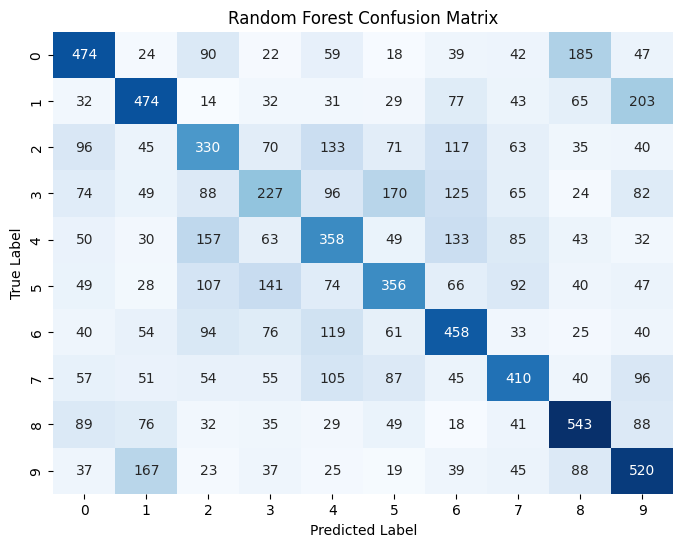

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train_gray = np.mean(x_train, axis=3)
x_test_gray = np.mean(x_test, axis=3)


x_train_gray = np.expand_dims(x_train_gray, axis=-1)                                     # having a validation of 20% of the data
x_test_gray = np.expand_dims(x_test_gray, axis=-1)


x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0


x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_gray, y_train, test_size=0.2, random_state=42)


x_train_flat = x_train_split.reshape(x_train_split.shape[0], -1)
x_val_flat = x_val_split.reshape(x_val_split.shape[0], -1)
x_test_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)


y_train_split = np.squeeze(y_train_split)
y_val_split = np.squeeze(y_val_split)
y_test = np.squeeze(y_test)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)


rf_classifier.fit(x_train_flat, y_train_split)

                                                                  # choosing random forest since it is the best classifer for the  colour images
y_pred_val = rf_classifier.predict(x_val_flat)


val_accuracy = accuracy_score(y_val_split, y_pred_val)
precision_val = precision_score(y_val_split, y_pred_val, average='macro')
recall_val = recall_score(y_val_split, y_pred_val, average='macro')
f1_val = f1_score(y_val_split, y_pred_val, average='macro')
confusion_mat_val = confusion_matrix(y_val_split, y_pred_val)


In [ ]:
print("Random Forest Performance on Validation Set:\n")
print("Validation Accuracy:", val_accuracy)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)
print("Confusion Matrix:")
print(confusion_mat_val)


y_pred_test = rf_classifier.predict(x_test_flat)


test_accuracy = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
confusion_mat_test = confusion_matrix(y_test, y_pred_test)

Random Forest Performance on Validation Set:

Validation Accuracy: 0.4124
Precision: 0.40939717208663196
Recall: 0.41254657893030766
F1 Score: 0.4092261368456137
Confusion Matrix:
[[410  44  77  17  54  34  41  39 191  66]
 [ 29 478   9  41  42  35  43  45  79 178]
 [ 94  37 314  80 163  82 100  75  52  33]
 [ 60  64  95 252 110 167 113  61  31  70]
 [ 66  26 112  46 360  50 111  90  50  22]
 [ 61  43  96 132  96 361  88  70  33  35]
 [ 42  66  91  60 129  61 447  30  24  46]
 [ 41  41  53  49 121  69  57 418  54  91]
 [ 93  90  27  40  31  51  39  42 529  75]
 [ 40 170  20  34  23  32  42  46  78 555]]


In [ ]:
print("\nRandom Forest Performance on Test Set:\n")
print("Test Accuracy:", test_accuracy)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("Confusion Matrix:")
print(confusion_mat_test)



Random Forest Performance on Test Set:

Test Accuracy: 0.4077
Precision: 0.4044064631671403
Recall: 0.4077
F1 Score: 0.4045338265577635
Confusion Matrix:
[[446  31  93  20  60  21  43  41 194  51]
 [ 29 473  11  33  37  38  59  46  70 204]
 [104  41 341  70 133  74 115  54  33  35]
 [ 69  45  77 229 106 160 134  68  34  78]
 [ 55  29 164  56 345  53 139  83  51  25]
 [ 51  40  94 136  88 351  79  88  40  33]
 [ 37  62  82  73 134  62 444  35  21  50]
 [ 52  50  59  67 110  78  41 397  54  92]
 [101  80  25  25  28  47  24  38 538  94]
 [ 44 157  19  21  34  26  33  56  97 513]]


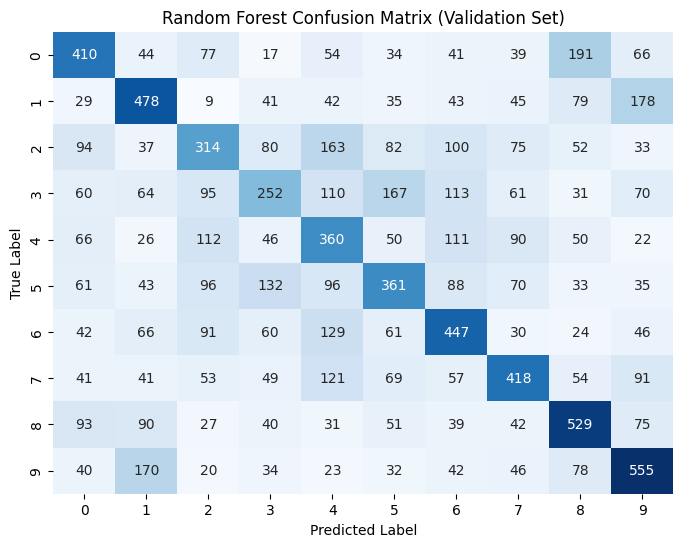

In [ ]:
# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

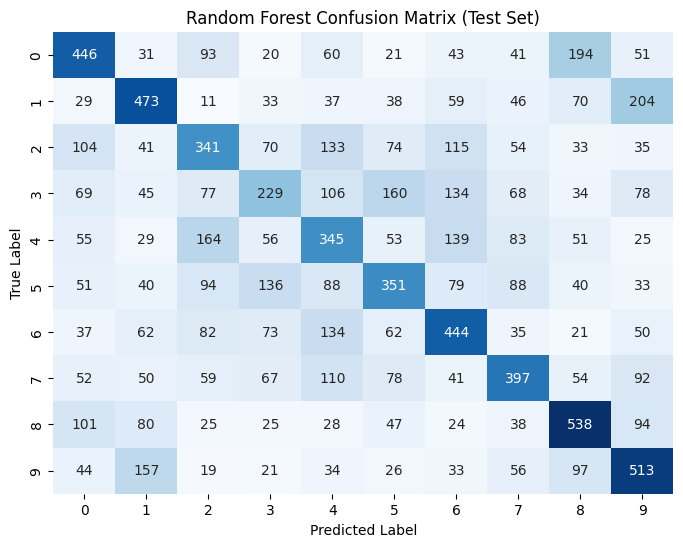

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train_gray = np.mean(x_train, axis=3)
x_test_gray = np.mean(x_test, axis=3)


x_train_gray = np.expand_dims(x_train_gray, axis=-1)
x_test_gray = np.expand_dims(x_test_gray, axis=-1)


x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0


x_train_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)
x_test_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)


y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100)


skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)                            # performing 3 fold cross validation using random forest since it is the best classifier for colour images
y_pred_cv = cross_val_predict(rf_classifier, x_train_flat, y_train, cv=skf)


accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv, average='macro')
recall = recall_score(y_train, y_pred_cv, average='macro')
f1 = f1_score(y_train, y_pred_cv, average='macro')
conf_mat = confusion_matrix(y_train, y_pred_cv)

Random Forest 3-Fold Cross-Validation Results:
Accuracy: 0.40378
Precision: 0.40086092619860364
Recall: 0.40378
F1 Score: 0.40076899942059124


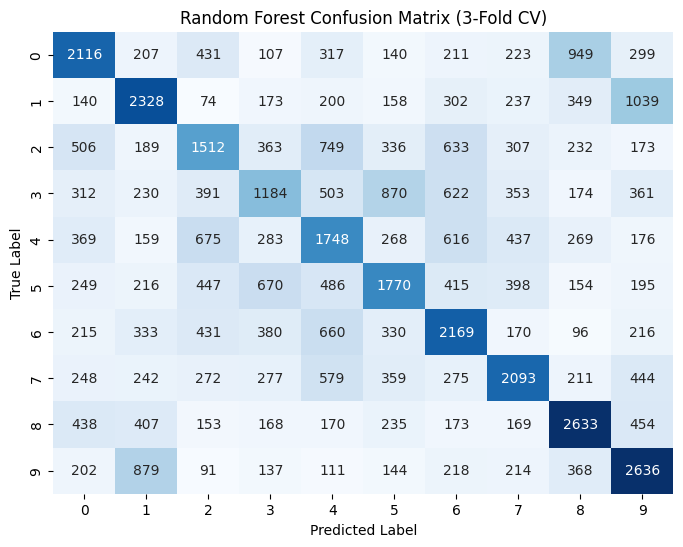

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Random Forest 3-Fold Cross-Validation Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (3-Fold CV)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100)

skf = StratifiedKFold(n_splits= 5 , shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(rf_classifier, x_train_flat, y_train, cv=skf)                  # performing 5 fold cross validation using random forest since it is the best classifier using colour images

accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv, average='macro')
recall = recall_score(y_train, y_pred_cv, average='macro')
f1 = f1_score(y_train, y_pred_cv, average='macro')
conf_mat = confusion_matrix(y_train, y_pred_cv)

Random Forest 5-Fold Cross-Validation Results:
Accuracy: 0.4095
Precision: 0.4068063770895235
Recall: 0.4095
F1 Score: 0.40672777203749344


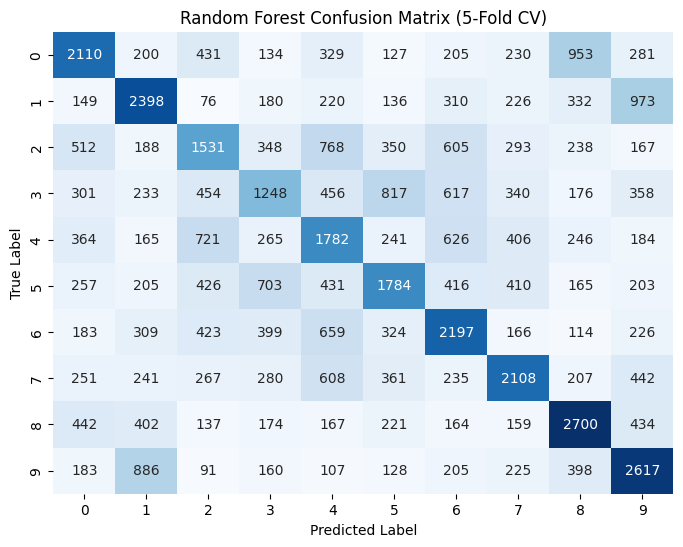

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Random Forest 5-Fold Cross-Validation Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (5-Fold CV)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100)

                                                                                          # Performing 10 fold cross validation using random forest since it was the best using colour images
skf = StratifiedKFold(n_splits= 10 , shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(rf_classifier, x_train_flat, y_train, cv=skf)


accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv, average='macro')
recall = recall_score(y_train, y_pred_cv, average='macro')
f1 = f1_score(y_train, y_pred_cv, average='macro')
conf_mat = confusion_matrix(y_train, y_pred_cv)

Random Forest 5-Fold Cross-Validation Results:
Accuracy: 0.4116
Precision: 0.4087186651090041
Recall: 0.41159999999999997
F1 Score: 0.40874301684370007


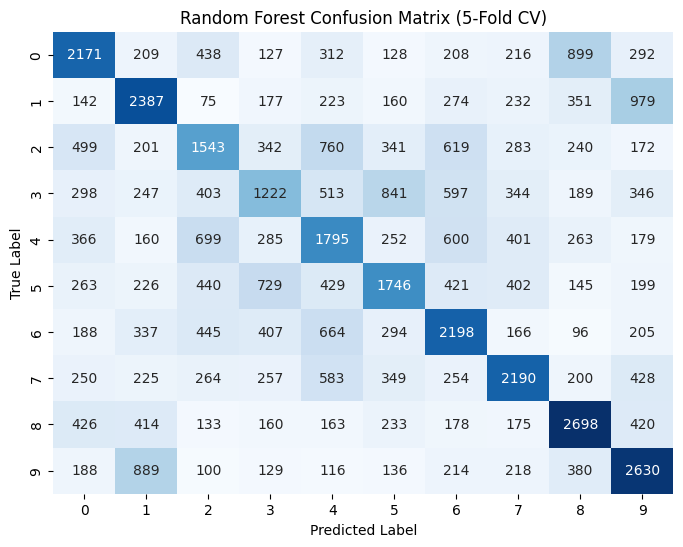

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Random Forest 5-Fold Cross-Validation Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (5-Fold CV)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train_gray = np.mean(x_train, axis=3)
x_test_gray = np.mean(x_test, axis=3)


x_train_gray = np.expand_dims(x_train_gray, axis=-1)
x_test_gray = np.expand_dims(x_test_gray, axis=-1)


x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0


x_train_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)
x_test_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)


y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100)


y_pred_cv = cross_val_predict(rf_classifier, x_train_flat, y_train, cv=loo)                  # perfoming loocv using random forest since it was the best using colour images


accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv, average='macro')
recall = recall_score(y_train, y_pred_cv, average='macro')
f1 = f1_score(y_train, y_pred_cv, average='macro')
conf_mat = confusion_matrix(y_train, y_pred_cv)